Лабораторная работа 0

Тема: Игра в имитацию

Вариант 6

Номер зачётки: 105223194

1) Дискретная случайная величина ξ принимает значения 0, 1, 2 и 3 с вероятностями соответствующими данным варианта. Используя генератор псевдослучайных чисел, получить 10000 чисел, имитирующих поведение ξ. Вывести значения частот появления значений 0, 1, 2 и 3. Проверить на уровне значимости 0,05 соответствие полученных данных распределению ξ, используя критерий сравнения долей. Вероятности: р0=i/2*(i+j+k), р1=(j+k)/2*(i+j+k), р2=(i+k)/2*(i+j+k), р3=j/2*(i+j+k). Значения i, j, k являются последними тремя цифрами зачетки. Если какая-то из этих трех цифр равна 0, то вместо 0 берется 10.

$i = 1, j = 9, k = 4$

$p_0 = \frac{1}{28} = 0.0357$

$p_1 = \frac{13}{28} = 0.4643$

$p_2 = \frac{5}{28} = 0.1786$

$p_3 = \frac{9}{28} = 0.3214$


In [210]:
import random
import scipy

SELECTION_AMOUNT = 280000
I = 1
J = 9
K = 4
G = 6  # Для s = 4, r = 1

def get_modified_p(i, j, k):
  p_sum = 2 * (i + j + k)
  p0 = i / p_sum
  p1 = (j + k) / p_sum
  p2 = (i + k) / p_sum
  p3 = j / p_sum

  return (p0, p1, p2, p3)

def modified_random(i, j, k):
  p0, p1, p2, p3 = get_modified_p(i, j, k)

  rand_val = random.random()

  if rand_val < p0:
    return 0
  elif rand_val < p0 + p1:
    return 1
  elif rand_val < p0 + p1 + p2:
    return 2

  return 3


p0, p1, p2, p3 = get_modified_p(I, J, K)
emps = [0] * 4
exps = [SELECTION_AMOUNT * p0,
        SELECTION_AMOUNT * p1,
        SELECTION_AMOUNT * p2,
        SELECTION_AMOUNT * p3]

for random_variable in (modified_random(I, J, K) for _ in range(0, SELECTION_AMOUNT)):
  emps[random_variable] += 1

K, p = scipy.stats.chisquare(f_obs=emps, f_exp=exps)

print("K =", K, "p =", p)

if K > G:
  print(f"Гипотеза отвергается, K > G ({K} > {G})")
else:
  print(f"Гипотеза подтвердилась, K < G ({K} < {G})")

K = 1.3521507692307693 p = 0.7167881634086022
Гипотеза подтвердилась, K < G (1.3521507692307693 < 6)


2. Непрерывная случайная величина ξ распределена по экспоненциальному закону с параметром λ соответствующим данным варианта. Построив генератор псевдослучайных чисел, получить 10000 чисел, имитирующих поведение ξ. Разбить выборку на интервалы и построить гистограмму частот. Вывести средние арифметическое значений выборки и проверить  на уровне значимости 0,05 соответствие полученных данных показательному распределению с параметром λ. Здесь λ определяется номер по списку разделить на 4.

$\lambda = 1.5$

F: $y = 1- e ^ {-λx}$

$ln(1 - y) = ln(e ^ {-λx})$

$x = \frac{ln(1 - y)}{-λ}$

Математическое ожидание при таком распределении
должно быть
$M = \frac{1}{λ} = \frac{2}{3}$

$σ = \frac{1}{λ} = \frac{2}{3}$

Среднее арифметическое M = 0.6679205083607518
K = 27.0008577377437 p = 0.13523986486332837
Гипотеза подтвердилась, K < G (27.0008577377437 < 33.9)


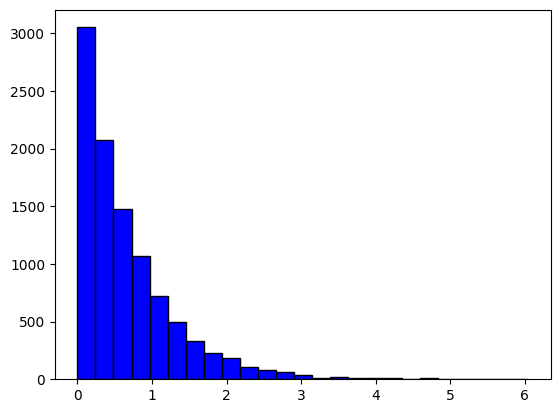

In [213]:
from re import M
import random
import scipy
import math
import matplotlib.pyplot as plt

GROUPS_AMOUNT = 25
SELECTION_AMOUNT = 10000
lambd = 1.5
G = 33.9

M_actual = 1 / lambd
Sigma_actual = 1 / lambd

def lambda_random():
  return math.log(1 - random.random()) / -lambd

def F(x):
  if x > 0:
    return 1 - math.exp(-lambd * x)
  return 0

vals = [lambda_random() for _ in range(0, SELECTION_AMOUNT)]
vals.sort(reverse=True)

mid = sum(vals) / len(vals)

print("Среднее арифметическое M =", mid)

val_max = vals[0]
val_min = 0

# Разделяем на группы и ведём подсчёт частот
emps = [0] * GROUPS_AMOUNT
exps = [0] * GROUPS_AMOUNT
emps_new = []
exps_new = []

for val in vals:
  freq_index = int(val * (GROUPS_AMOUNT / val_max))
  if freq_index < GROUPS_AMOUNT:
    emps[freq_index] += 1

for i in range(0, GROUPS_AMOUNT):
  lower = i * (val_max / GROUPS_AMOUNT)
  upper = (i + 1) * (val_max / GROUPS_AMOUNT)

  probability = F(upper) - F(lower)

  exps[i] = int(probability * SELECTION_AMOUNT)

  if (exps[i] != 0):
    emps_new.append(emps[i])
    exps_new.append(exps[i])

exps_new[0] += sum(emps_new) - sum(exps_new)

K, p = scipy.stats.chisquare(f_obs=emps_new, f_exp=exps_new, ddof=2)

print("K =", K, "p =", p)

if K > G:
  print(f"Гипотеза отвергается, K > G ({K} > {G})")
else:
  print(f"Гипотеза подтвердилась, K < G ({K} < {G})")

plt.hist(vals, color = 'blue', edgecolor = 'black',
         bins = int(GROUPS_AMOUNT))
plt.show()